In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

In [223]:
df.isna().values.any()

False

In [4]:
np.random.seed(1)

In [7]:
#I start from k = 3, and I will start from only columns alcohol and Malic acid
k = 3
df.max()

Alcohol                           14.83
Malic acid                         5.80
Ash                                3.23
Alcalinity of ash                 30.00
Magnesium                        162.00
Total phenols                      3.88
Flavanoids                         5.08
Nonflavanoid phenols               0.66
Proanthocyanins                    3.58
Color intensity                   13.00
Hue                                1.71
OD280/OD315 of diluted wines       4.00
Proline                         1680.00
dtype: float64

In [8]:
df.min()

Alcohol                          11.03
Malic acid                        0.74
Ash                               1.36
Alcalinity of ash                10.60
Magnesium                        70.00
Total phenols                     0.98
Flavanoids                        0.34
Nonflavanoid phenols              0.13
Proanthocyanins                   0.41
Color intensity                   1.28
Hue                               0.48
OD280/OD315 of diluted wines      1.27
Proline                         278.00
dtype: float64

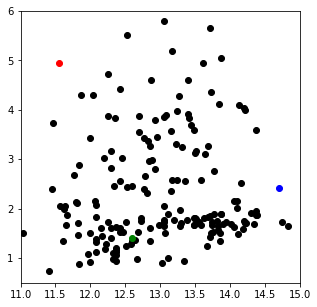

In [103]:
#so I take the random centroids, for this first 2variable k-mean 
centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6)] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(11,15)
plt.ylim(0.5,6)
plt.show()

In [104]:
df.loc[0][0]
centroids

{1: [11.557105389003034, 4.9406520879023805],
 2: [12.590707347942134, 1.4094480841431303],
 3: [14.710034321584136, 2.4127122286002862]}

In [105]:
#I create a function that performs the euclidean distance and decides which to take as closest
def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    return df

In [189]:
df = euclid(df, centroids)
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [107]:
#df[df['clusters']==1]
centroids

{1: [11.557105389003034, 4.9406520879023805],
 2: [12.590707347942134, 1.4094480841431303],
 3: [14.710034321584136, 2.4127122286002862]}

In [108]:
def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid']
    for i in range(1,k+1):
        for j in range(2):
            #print(df[df['clusters']==i][names[j]])
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr

In [110]:
import copy
old_centroids = copy.deepcopy(centroids)

In [111]:
old_centroids

{1: [11.557105389003034, 4.9406520879023805],
 2: [12.590707347942134, 1.4094480841431303],
 3: [14.710034321584136, 2.4127122286002862]}

In [85]:
#I keep the old centroids to make some arrows
#old_centroids = centroids
new_centroids(df, centroids, 3)

21     12.93
41     13.41
43     13.24
45     14.21
79     12.70
83     13.05
123    13.05
133    12.70
143    13.62
146    13.88
147    12.87
149    13.08
155    13.17
156    13.84
165    13.73
169    13.40
173    13.71
174    13.40
175    13.27
177    14.13
Name: Alcohol, dtype: float64
21     3.80
41     3.84
43     3.98
45     4.04
79     3.87
83     3.86
123    5.80
133    3.55
143    4.95
146    5.04
147    4.61
149    3.90
155    5.19
156    4.12
165    4.36
169    4.60
173    5.65
174    3.91
175    4.28
177    4.10
Name: Malic acid, dtype: float64
74     11.96
75     11.66
77     11.84
84     11.84
87     11.65
88     11.64
90     12.08
91     12.00
93     12.29
94     11.62
96     11.81
99     12.29
100    12.08
103    11.82
109    11.61
110    11.46
112    11.76
113    11.41
115    11.03
116    11.82
119    12.00
120    11.45
121    11.56
122    12.42
124    11.87
125    12.07
127    11.79
129    12.04
136    12.25
137    12.53
144    12.25
157    12.45
160    12.36
170    1

{1: [13.369500000000002, 4.3725],
 2: [11.909117647058824, 2.6008823529411766],
 3: [13.240403225806446, 1.9354032258064517]}

In [112]:
centroids = new_centroids(df, centroids, 3)

In [146]:
old_centroids.keys()
#old_centroids[1][1]
colmap = {1 :'r', 2 : 'g', 3 : 'b'}
colmap[1]

'r'

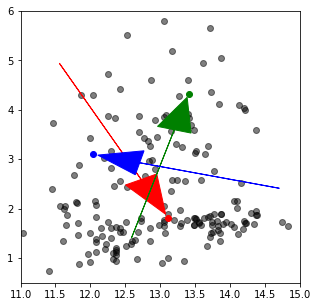

In [160]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes()
plt.scatter(df['Alcohol'], df['Malic acid'],alpha = 0.5, color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(11,15)
plt.ylim(0.5,6)
old = []
for i in old_centroids.keys():
    
    l = []
    for j in range(0,2):
        l.append(old_centroids[i][j])
    old.append(l)
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=0.5, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
plt.show()

In [164]:
A =df['clusters'].copy(deep=True)
A

0      1
1      1
2      1
3      1
4      1
      ..
173    2
174    2
175    2
176    1
177    2
Name: clusters, Length: 178, dtype: int64

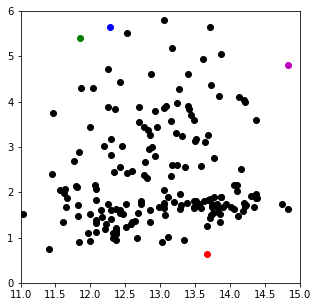

{1: [13.672254472678867, 0.6461934392238624], 2: [11.85869919985271, 5.404182721075373], 3: [12.281437132703017, 5.657429225507385], 4: [14.838526459505864, 4.8085451201946725]}
{1: [12.992248062015495, 1.738914728682171], 2: [12.379523809523809, 3.620952380952381], 3: [12.939999999999998, 5.002], 4: [13.627826086956517, 3.9347826086956514]}


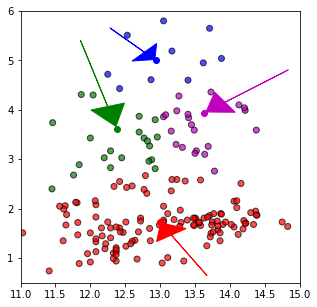

{1: [13.006747967479665, 1.6875609756097563], 2: [12.375652173913041, 3.3486956521739133], 3: [13.09, 5.05], 4: [13.579090909090906, 3.6718181818181814]}


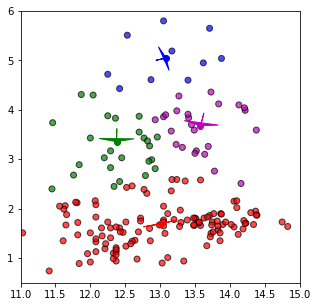

{1: [13.009411764705872, 1.6587394957983197], 2: [12.370399999999997, 3.2356000000000007], 3: [13.09, 5.05], 4: [13.57625, 3.6287499999999997]}


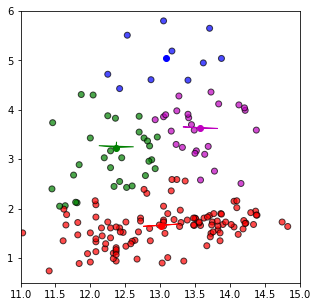

{1: [13.059107142857133, 1.6210714285714285], 2: [12.296129032258063, 3.036774193548387], 3: [13.09, 5.05], 4: [13.5764, 3.5867999999999993]}


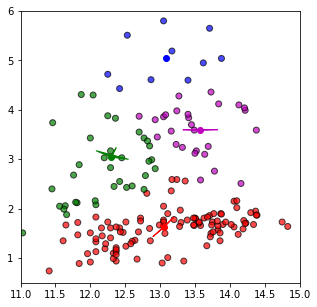

{1: [13.126320754716973, 1.5995283018867925], 2: [12.192857142857143, 2.8237142857142854], 3: [13.09, 5.05], 4: [13.52111111111111, 3.592222222222222]}


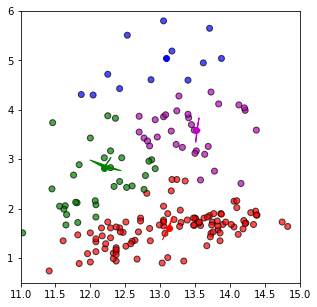

{1: [13.163495145631062, 1.5954368932038836], 2: [12.101562499999998, 2.556875], 3: [12.900833333333333, 4.925833333333333], 4: [13.426129032258064, 3.5680645161290325]}


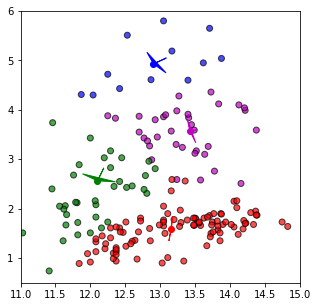

{1: [13.247789473684207, 1.5896842105263158], 2: [12.050555555555555, 2.2733333333333334], 3: [12.900833333333333, 4.925833333333333], 4: [13.341142857142856, 3.5400000000000005]}


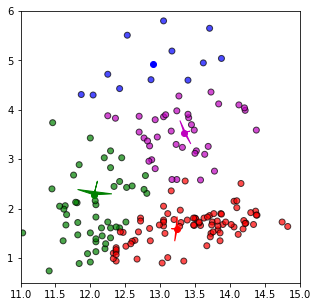

{1: [13.44456790123457, 1.6329629629629632], 2: [12.053541666666668, 1.97375], 3: [12.900833333333333, 4.925833333333333], 4: [13.289729729729727, 3.5067567567567575]}


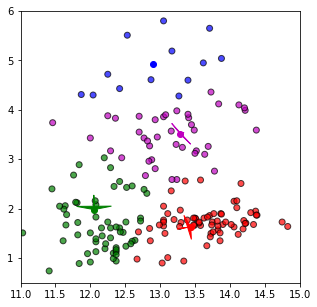

{1: [13.662835820895525, 1.7223880597014936], 2: [12.151034482758625, 1.6922413793103446], 3: [12.92923076923077, 4.876153846153846], 4: [13.1465, 3.47325]}


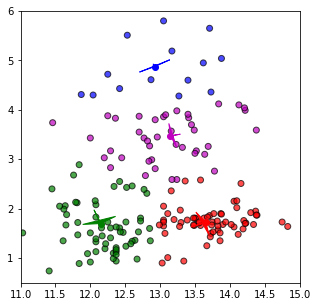

{1: [13.719682539682543, 1.7450793650793661], 2: [12.189, 1.6291666666666664], 3: [12.986428571428574, 4.839285714285714], 4: [13.088292682926827, 3.4251219512195124]}
yeeeeeee


In [2]:
import copy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('wine.data', header = None)
df.columns=['class identifier','Alcohol', 'Malic acid','Ash','Alcalinity of ash',
            'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
            'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df = df.drop(columns = 'class identifier')

k = 4

centroids = {
    i+1:[np.random.uniform(11,15), np.random.uniform(0.5,6)] for i in range(k)
}
fig = plt.figure(figsize = (5,5))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'k')
colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
for i in centroids:
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(11,15)
plt.ylim(0,6)
plt.show()
print(centroids)

def euclid(df, centroids):
    klust = []
    for i in range(len(df)):
        ds = []
        for h in range(1,k+1):
            dist = 0
            for j in range(2):
                #print(dist)
                if(centroids[h][j] == 'nan' ):
                    print('PORCAPUPAZZA')
                dist = dist + (df.loc[i][j]-centroids[h][j])**2
            dist = np.sqrt(dist)
            if(dist == 'nan' ):
                    print('PORCAPUPAZZA')
            ds.append(dist)
        klust.append(np.argmin(ds) + 1)
    df['clusters'] = klust
    df['color'] = df['clusters'].map(lambda x: colmap[x])
    return df
#put the first clusters
df = euclid(df, centroids)
df.head()

def new_centroids(df, centr, k):
    names = ['Alcohol', 'Malic acid']
    for i in range(1,k+1):
        for j in range(2):
            centr[i][j] = np.mean(df[df['clusters']==i][names[j]])
    return centr


#o = 0
while True:
    closest_centroids = df['clusters'].copy(deep=True)
    old_centroids = copy.deepcopy(centroids)
    centroids = new_centroids(df, centroids, k)
    df = euclid(df, centroids)
    print(centroids)
    if closest_centroids.equals(df['clusters']):
        print('yeeeeeee')
        break   
    fig = plt.figure(figsize = (5,5))
    ax = plt.axes()
    colmap = {1 :'r', 2 : 'g', 3 : 'b', 4 : 'm'}
    plt.scatter(df['Alcohol'], df['Malic acid'], alpha = 0.7, color = df['color'], edgecolor = 'k')
    for i in centroids:
        plt.scatter(*centroids[i], color = colmap[i])
    plt.xlim(11,15)
    plt.ylim(0.5,6)
    old = []
    for i in old_centroids.keys():
        l = []
        for j in range(0,2):
            l.append(old_centroids[i][j])
        old.append(l)
        dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
        dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
        ax.arrow(old[i-1][0], old[i-1][1], dx, dy, head_width=0.5, head_length=np.sqrt(dx**2+dy**2)*0.3, fc=colmap[i], ec=colmap[i])
    plt.show()
    #o = o+1
#plt.show()